# SOM Ontologias

Usamos un SOM para agrupar las familias de Ontologias 

In [2]:
%matplotlib inline
import numpy as np
import csv


import pandas as pd
from matplotlib import pyplot as plt

from sklearn.neural_network  import MLPClassifier
from sklearn.neural_network  import BernoulliRBM
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline        import Pipeline
from sklearn.preprocessing   import MinMaxScaler, StandardScaler, scale


from minisom import MiniSom
#from sompy.sompy import som

import seaborn as sns


### Datos Gene Ontology

Leemos las funciones asociadas a cada familia, una por línea, del archivo `familiasOntologia2b.csv`. Lo guardamos en las listas `F` y `U`

In [2]:
ls familiasOntologia2b.csv

familiasOntologia2b.csv


In [7]:
#familia y funcion
F, U = [], []
f = open('familiasOntologia2b.csv','r')
fcsv = csv.reader(f)
for r in fcsv:
    F.append(r[0])
    U.append(r[1].strip())


Desués guardamos en los diccionarios `G` los datos recién leídos. Cada entrada está definida por la llave familia y tiene asociada una lista de valores que corresponden a cada función leída en el paso anterior.

En `C` guardamos la pareja ordenada de datos de la germibera de cada familia.

In [8]:
G, C = {}, {}
for x,y in zip(F[1:],U[1:]):
    l = G.get(x,[])
    l.append(y.strip())
    G[x] = l
print(len(G))
g = open('coefs_orden.dat','r')
gcsv = csv.DictReader(g)

existentes, faltantes = 0, 0
for r in gcsv:
    na = r['familia']
    print(na)
    try:
        t = np.array((float(r['a']), float(r['b'])))
        #print("{} : {}".format(na,t))
        C[na] = t
        #print(C[na])
        existentes += 1
    except:
        faltantes += 1
#print("{} , {}".format(existentes,faltantes))

206
PF00005
PF00006
PF00009
PF00012
PF00013
PF00017
PF00023
PF00025
PF00026
PF00027
PF00035
PF00036
PF00042
PF00043
PF00069
PF00070
PF00071
PF00072
PF00076
PF00078
PF00083
PF00085
PF00096
PF00097
PF00106
PF00107
PF00108
PF00109
PF00115
PF00122
PF00125
PF00132
PF00134
PF00137
PF00149
PF00150
PF00153
PF00160
PF00168
PF00169
PF00170
PF00171
PF00172
PF00173
PF00176
PF00179
PF00201
PF00202
PF00205
PF00226
PF00237
PF00240
PF00249
PF00258
PF00268
PF00270
PF00271
PF00289
PF00291
PF00294
PF00300
PF00310
PF00318
PF00320
PF00324
PF00327
PF00349
PF00350
PF00364
PF00368
PF00370
PF00382
PF00385
PF00397
PF00399
PF00400
PF00408
PF00428
PF00432
PF00439
PF00443
PF00444
PF00454
PF00459
PF00478
PF00481
PF00501
PF00505
PF00510
PF00514
PF00515
PF00533
PF00534
PF00561
PF00566
PF00571
PF00578
PF00581
PF00583
PF00587
PF00610
PF00614
PF00615
PF00620
PF00624
PF00628
PF00632
PF00635
PF00637
PF00638
PF00642
PF00646
PF00664
PF00665
PF00674
PF00682
PF00684
PF00687
PF00690
PF00702
PF00710
PF00735
PF00743
PF00753
PF00

Definimos las funciones con las que nos queremos quedar y las ponemos en `L` porque serviran como un vector de entradas de 1s y 0s dependiendo de si la función está en la familia o no.

In [9]:
print(len(set(U)))
L = []
for i,j in enumerate(set(U)):
    L.append(j)
print(L)

18
['transmembrane transporter', 'motor activity', 'translocases', 'electron transfer activity', 'binding', 'transferase', 'structural molecule activity', 'antioxidant activity', 'translation initiation factor activity', 'copper chaperone activity', 'isomerase', 'oxidoreductase', 'catalytic activity', 'ligase', 'hydrolase', 'protein dimerization activity', 'lyase', 'structural constituent']


In [10]:
L = ['hydrolase', 'electron transfer activity', 'protein dimerization activity', 'isomerase', 'motor activity', 'transferase', 'transmembrane transporter', 'translation initiation factor activity', 'binding', 'translocases', 'antioxidant activity', 'structural constituent', 'oxidoreductase', 'ligase', 'structural molecule activity', 'catalytic activity', 'lyase', 'copper chaperone activity','a','b']

Guardamos esas vectores en `P` a partir de los índices que la función `extrae_indices` obtiene (su valor se deja en el vector `V`).

In [11]:
extrae_indices = lambda v: [L.index(k) for k in v]
P = []
for g in G:
    V = np.array([0]*len(set(U)))
    V[extrae_indices(G[g])] = 1
    vc = np.hstack((V,C[g]))
    l = [g] + vc.tolist()
    P.append(l)

nums = list(range(1,27))
ncols = ['familia'] + L
df = pd.DataFrame(P, columns=ncols)

Lo convertimos en un dataframe

In [12]:
df.head(10)

,familia,hydrolase,electron transfer activity,protein dimerization activity,isomerase,motor activity,transferase,transmembrane transporter,translation initiation factor activity,binding,...,antioxidant activity,structural constituent,oxidoreductase,ligase,structural molecule activity,catalytic activity,lyase,copper chaperone activity,a,b
0,PF00005,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.854726,0.399581
1,PF00006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.773303,0.465925
2,PF00009,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.725873,0.473624
3,PF00013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.488458,0.450859
4,PF00023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.985735,0.398635
5,PF00025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.838089,0.570980
6,PF00036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.739198,0.549263
7,PF00042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.136225,0.703781
8,PF00069,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.875448,0.460223
9,PF00070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.691843,0.589074


In [13]:
df.describe()

,hydrolase,electron transfer activity,protein dimerization activity,isomerase,motor activity,transferase,transmembrane transporter,translation initiation factor activity,binding,translocases,antioxidant activity,structural constituent,oxidoreductase,ligase,structural molecule activity,catalytic activity,lyase,copper chaperone activity,a,b
count,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000,206.000000
mean,0.145631,0.004854,0.004854,0.009709,0.004854,0.160194,0.043689,0.014563,0.529126,0.004854,0.004854,0.033981,0.097087,0.033981,0.004854,0.048544,0.009709,0.004854,0.797169,0.535159
std,0.353595,0.069673,0.069673,0.098292,0.069673,0.367680,0.204901,0.120088,0.500367,0.069673,0.069673,0.181621,0.296798,0.181621,0.069673,0.215436,0.098292,0.069673,0.305405,0.214636
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.131018,-0.054945
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.606088,0.413930
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.766433,0.509387
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.945894,0.617572
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.043543,1.539781


Quitamos aquellas familias que solo tuvieron un 1

In [14]:
#quitamos aquellas que solo tuvieron un 1
Q = []
for c in df[df.columns[1:]].iteritems():
    s = sum(c[1])
    if(s<=1):
        print(c[0])
        Q.append(c[0])

electron transfer activity
protein dimerization activity
motor activity
translocases
antioxidant activity
structural molecule activity
copper chaperone activity


In [15]:
R=list(set(L).difference(set(Q)))
print(R)
print(len(R))


['transmembrane transporter', 'a', 'binding', 'b', 'transferase', 'translation initiation factor activity', 'isomerase', 'oxidoreductase', 'ligase', 'catalytic activity', 'hydrolase', 'lyase', 'structural constituent']
13


### Datos germibeta

En `atribs_informacion.csv` están los coeficientes del ajuste de la germibeta para cada familia por lo que lo leeremos para cruzarlo con el otro dataframe.

In [16]:
df_compres = pd.read_csv('atribs_informacion.csv')
df_compres.head()

,familia,H,K
0,PF00005,4.657690,0.568075
1,PF00006,4.569146,0.404377
2,PF00009,4.744185,0.500737
3,PF00012,4.823600,0.514183
4,PF00013,4.864910,0.395101


In [17]:
#familias con indice de compresión existente
df_ext = df.merge(df_compres.loc[df_compres.familia.isin(df.familia)])

In [18]:
genera_df = False
if(not genera_df):
    df_ext.to_csv('fams_ontologia_KH.csv')
else:
    df_ext = pd.read_csv('fams_ontologia_KH.csv', index_col=0)
df_ext.head(10)

,familia,hydrolase,electron transfer activity,protein dimerization activity,isomerase,motor activity,transferase,transmembrane transporter,translation initiation factor activity,binding,...,oxidoreductase,ligase,structural molecule activity,catalytic activity,lyase,copper chaperone activity,a,b,H,K
0,PF00005,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.854726,0.399581,4.657690,0.568075
1,PF00006,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.773303,0.465925,4.569146,0.404377
2,PF00009,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.725873,0.473624,4.744185,0.500737
3,PF00013,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.488458,0.450859,4.864910,0.395101
4,PF00023,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.985735,0.398635,4.477511,0.154919
5,PF00025,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.838089,0.570980,4.665324,0.541277
6,PF00036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.739198,0.549263,4.555598,0.333819
7,PF00042,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.136225,0.703781,4.433374,0.576965
8,PF00069,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.875448,0.460223,4.747558,0.621502
9,PF00070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.691843,0.589074,4.608995,0.595045


### Dataframe final

El dataframe final que se usa para el som está a continuación, así como diferentes subconjuntos de familias


In [19]:
#R original
#R = ['familia', 'a', 'b','hydrolase','isomerase', 'transferase', 'transmembrane transporter', 'translation initiation factor activity','binding', 'ligase', 'structural constituent', 'oxidoreductase', 'catalytic activity', 'lyase', 'H', 'K']

#R = ['familia', 'a', 'b', 'H', 'K' ]
#R = ['familia', 'binding', 'transferase', 'hydrolase']
R = ['familia', 'a', 'b', 'H', 'K', 'binding', 'transferase', 'hydrolase']

df = df_ext[R]
k = len(R)-1
#datos = scale(df_ext[R[1:]].values)
datos = MinMaxScaler().fit_transform(df_ext[R[1:]].values)
print(datos)
ln = int(np.sqrt(len(datos)))
print(ln)

[[0.37840447 0.28501824 0.64521865 ... 0.         0.         1.        ]
 [0.3358309  0.32662037 0.57972569 ... 1.         0.         0.        ]
 [0.31103123 0.33144816 0.70919583 ... 1.         0.         1.        ]
 ...
 [0.09606724 0.29032135 0.87887022 ... 1.         0.         0.        ]
 [0.34233853 0.3929628  0.60078891 ... 1.         0.         0.        ]
 [0.60877426 0.55411588 0.35840867 ... 1.         0.         0.        ]]
14


Generamos vectores con entradas aleatorias (unif(p)) para mostrar como funciona el mapa con vectores aleatorios. Se generan 50 vectores que serán exhibidos en el som final.


In [20]:
def genera_v_random(dim1=4,dim2=3):
    v = np.random.rand(dim1,)
    w = [np.random.randint(0,2) for _ in range(dim2)]
    return np.concatenate((v,np.array(w)))

def prots_aleatorias(N, dim1, dim2):
    V = []
    for i in range(N):
        V.append(genera_v_random(dim1,dim2))
    return np.array(V)

V = prots_aleatorias(50,4,3)
N = ['frand_{}'.format(i) for i in range(len(V))]
print(N)
print(V)

['frand_0', 'frand_1', 'frand_2', 'frand_3', 'frand_4', 'frand_5', 'frand_6', 'frand_7', 'frand_8', 'frand_9', 'frand_10', 'frand_11', 'frand_12', 'frand_13', 'frand_14', 'frand_15', 'frand_16', 'frand_17', 'frand_18', 'frand_19', 'frand_20', 'frand_21', 'frand_22', 'frand_23', 'frand_24', 'frand_25', 'frand_26', 'frand_27', 'frand_28', 'frand_29', 'frand_30', 'frand_31', 'frand_32', 'frand_33', 'frand_34', 'frand_35', 'frand_36', 'frand_37', 'frand_38', 'frand_39', 'frand_40', 'frand_41', 'frand_42', 'frand_43', 'frand_44', 'frand_45', 'frand_46', 'frand_47', 'frand_48', 'frand_49']
[[0.31326765 0.93579417 0.80608557 0.11867049 1.         0.
  0.        ]
 [0.65719806 0.53729091 0.0825027  0.71288602 0.         1.
  0.        ]
 [0.3786902  0.28594838 0.245978   0.21543935 1.         0.
  0.        ]
 [0.67665693 0.1325878  0.6774623  0.67577514 0.         1.
  0.        ]
 [0.61287107 0.31191148 0.38943881 0.15066795 0.         0.
  0.        ]
 [0.67164355 0.44443425 0.00187166 0.02

## SOM 
Usamos MiniSom para encontrar los grupos

### Hiperparámetros
Primero vamos a buscar los hiperparámetros. El tamaño del mapa es
$$
ln = \sqrt{ |datos| } = 14
$$

Y vamos a proponer algunos valores para sigma

$$ \sigma = \{1, 2, ... \frac{ln}{2} \} $$

Así como para la constante de aprendizaje

In [21]:
import pickle 
#si deseamos recuperar algún modelo anterior

recupera=False
if(recupera):
    som = pickle.load(open('som_13x12_500_s1_ca1.pkl','rb'))

Hacemos la búsqueda de parámetros.

In [22]:
ln=14 
dim_som = (ln,ln)
sigmas = [1,1.5,2,3]  #sigmas a intentar
constantes = [1,2,3]  #constantes de aprendizaje a buscar
errores = []
if(not recupera):
    buscar=False
    if(buscar):
        for s in sigmas:
            for c in constantes:
                som = MiniSom(dim_som[0], dim_som[1], k, sigma=s, learning_rate=c)
                som.pca_weights_init(datos)
                som.train_batch(datos,1000)
                q = som.quantization_error(datos)
                errores.append( (s,c, q) )
                print( "s: {}  c: {} -> q: {}".format(s,c,q))
    else:
        errores = [(1,3,0.69)]
else:
    errores = [(1,3,0.069)]

In [23]:
print(errores)
mejor = sorted(errores, key=lambda x: x[2])[0]
print("Sigma {}, ca {}".format(mejor[0], mejor[1]))

[(1, 3, 0.69)]
Sigma 1, ca 3


In [24]:
if(not recupera):
    som = MiniSom(dim_som[0], dim_som[1], k, sigma=mejor[0], learning_rate=mejor[1])
    som.pca_weights_init(datos)
    som.train_batch(datos,500)
q = som.quantization_error(datos)
print(q)

0.07228184813124076


In [25]:
nombres = df_ext['familia'].values
qnt = som.quantization(datos)
print(len(qnt))
print(len(R[1:]))
print(k)

206
7
7


## SOM entrenado

Imprimimos las componentes

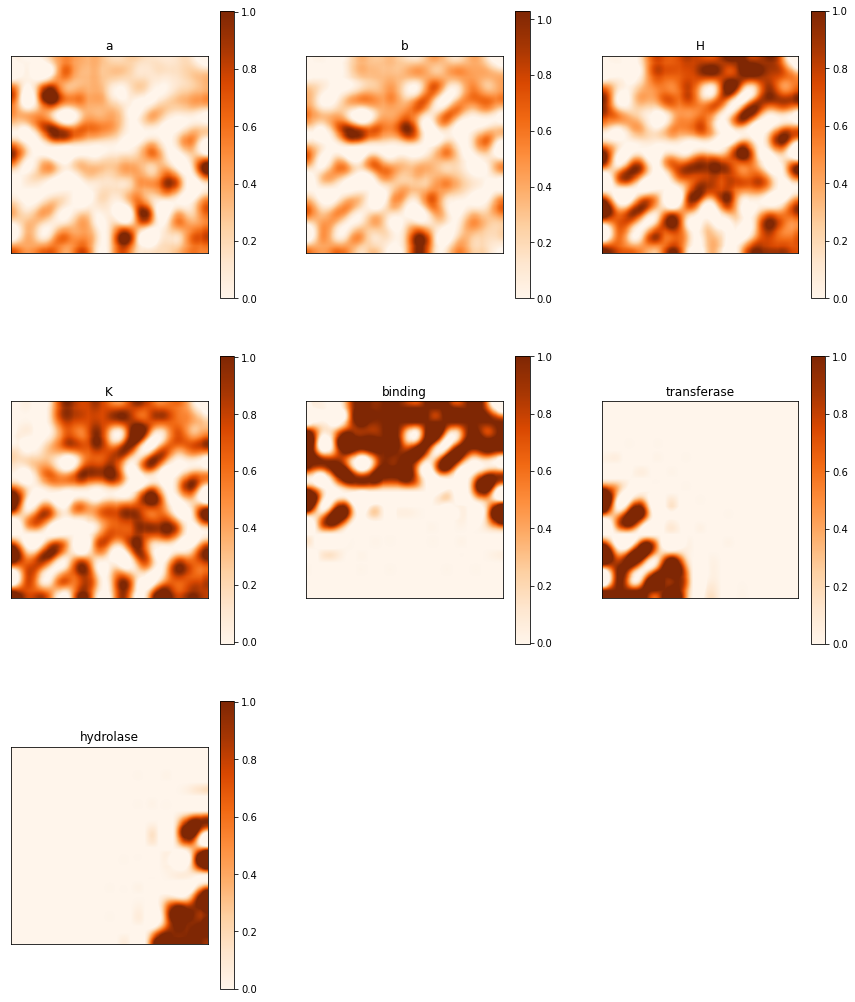

In [30]:
color='Oranges'
inter='sinc'
rs, cs = 3,3
fig, axn = plt.subplots(rs,cs, figsize=(15,18))

for j,ax in enumerate(axn.flat):
    if(j<k):
        D = np.zeros(dim_som)
        for ix,d in enumerate(datos):
            w = som.winner(d)
            D[w] = qnt[ix][j]
        plt.subplot(rs,cs,j+1)
        plt.xticks([])
        plt.yticks([])
        plt.title(R[1:][j])
        plt.imshow(D,interpolation=inter,cmap=color)
        plt.colorbar()
        ax.axis('off')
    else:
        ax.axis('off')
    

In [27]:
def get_id_fam(i):
    fam = df.iloc[i].familia
    return fam[3:].translate({ord('0'):''})

winners = {}
for i,d in enumerate(datos):
    win = som.winner(d)
    winners[win] = winners.get(win,[]) + [get_id_fam(i)]
    
randoms = {}
for i,d in enumerate(V):
    win = som.winner(d)
    randoms[win] = randoms.get(win,[]) + ['frand_{}'.format(i)]
#for w in sorted(winners):
#    print("{} : {}".format(w,winners[w]))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  # Remove the CWD from sys.path while we load stuff.


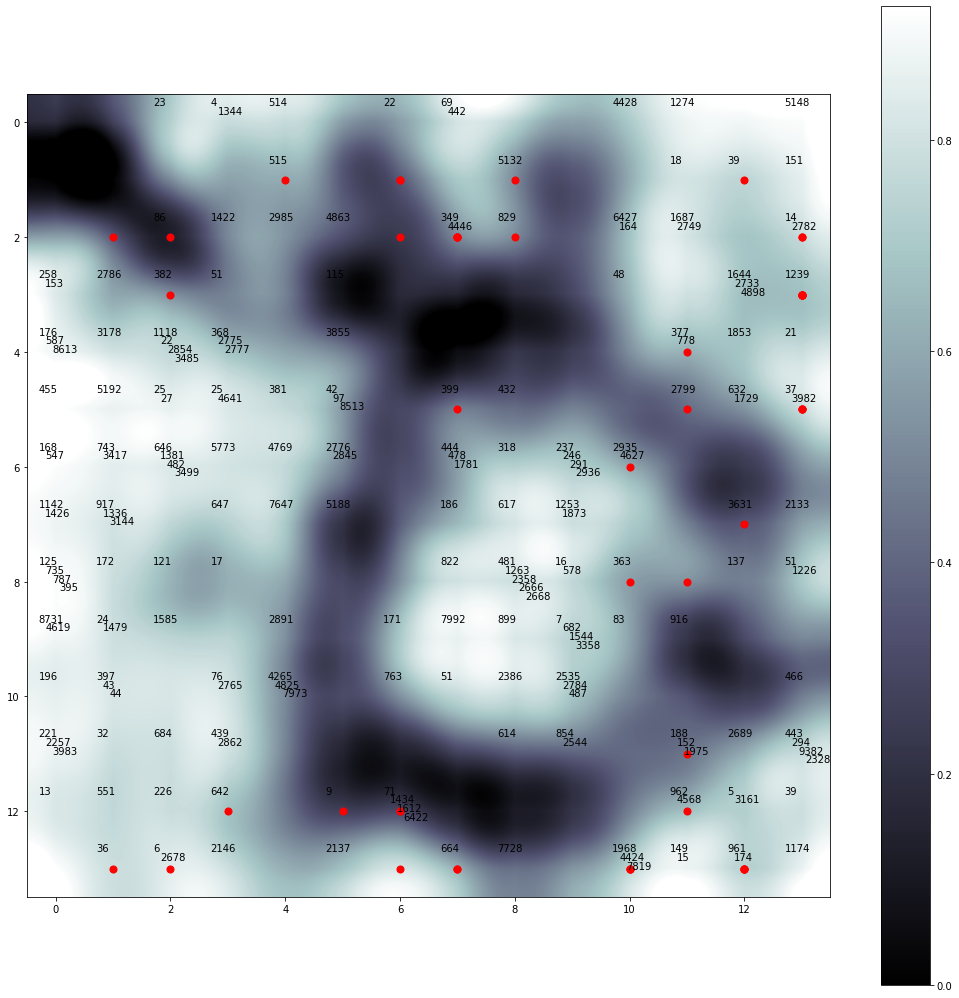

In [28]:
fig, axn = plt.subplots(1,1, figsize=(18,18))

M = 1- som.distance_map().T


for w in winners:
    l = winners[w]
    i,j = -0.3,-0.3
    for f in l:
        plt.annotate(s=f,xy=w, xytext=(w[0]+i,w[1]+j))
        i += 0.12
        j += 0.15

for w in randoms:
    l = randoms[w]
    i,j = -0.3, -0.3
    for f in l:
        plt.scatter(w[0], w[1], s=50, c='r')

plt.imshow(M, interpolation=inter, cmap='bone')
plt.colorbar()

In [29]:
import pickle
resp = input("Nombre para salvar el modelo (-1 para no salvar): ")
if(resp != "-1"):
    print("Salvando en {}".format(resp))
    pickle.dump(som,open(resp,'wb'))

Nombre para salvar el modelo (-1 para no salvar): -1


## Grupos de familias

Ahora con un _clustering jerárquico_ y con la información de 6 grupos determinados por el SOM obtenemos los grupos de proteínas.

In [31]:
# from scipy.cluster import hierarchy
from sklearn.cluster import AgglomerativeClustering
import pandas as pd

In [32]:
qnt[0], datos[0]

(array([ 4.41159649e-01,  2.85289834e-01,  6.43407219e-01,  7.07047015e-01,
        -4.36299413e-10, -6.52257816e-16,  9.99994600e-01]),
 array([0.37840447, 0.28501824, 0.64521865, 0.71896834, 0.        ,
        0.        , 1.        ]))

In [33]:
n_clusters=6
cluster = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', affinity='euclidean')
cl = cluster.fit_predict(qnt)

In [34]:
clases = dict()

In [35]:
for f, c in zip(nombres, cl):
    clases[c] = clases.get(c,[]) + [f]

Escribimos los grupos en archivos `grupo_i.dat`.

In [36]:
fam_grupo = lambda n: list(nombres[cl==n])
def escribe_gpo(i):
    fout = open('grupo_{}.dat'.format(i),'w')
    gpo = '\n'.join(fam_grupo(i))
    fout.write(gpo)
    fout.close()

for i in range(4):
    escribe_gpo(i)

In [37]:
for c in sorted(clases):
    print("Clase {}".format(c))
    print("\n".join(clases[c]))
    print("Cantidad de proteínas {}".format(len(clases[c])))
    print("\n")

Clase 0
PF00006
PF00013
PF00023
PF00025
PF00036
PF00042
PF00076
PF00097
PF00115
PF00125
PF00170
PF00172
PF00176
PF00205
PF00240
PF00258
PF00270
PF00320
PF00368
PF00382
PF00397
PF00400
PF00439
PF00514
PF00515
PF00587
PF00642
PF00646
PF00684
PF00735
PF00743
PF00787
PF00806
PF00917
PF01021
PF01053
PF01068
PF01096
PF01118
PF01142
PF01336
PF01344
PF01381
PF01422
PF01426
PF01479
PF01585
PF02020
PF02146
PF02201
PF02257
PF02260
PF02765
PF02775
PF02776
PF02777
PF02786
PF02845
PF02854
PF02862
PF02891
PF02985
PF03144
PF03178
PF03485
PF03810
PF03950
PF03983
PF04055
PF04082
PF04265
PF04769
PF04825
PF05001
PF05051
PF05188
PF05192
PF05470
PF05773
PF06470
PF07647
PF07973
PF08513
PF08613
PF08731
PF10403
PF10404
PF12678
PF13417
PF13499
PF13855
PF14619
PF14641
PF14863
Cantidad de proteínas 94


Clase 1
PF00070
PF00083
PF00137
PF00160
PF00171
PF00237
PF00318
PF00399
PF00432
PF00444
PF00478
PF00481
PF00501
PF00510
PF00578
PF00614
PF00682
PF00763
PF00854
PF00899
PF00916
PF01086
PF01226
PF01253
PF01263
PF015

Hacemos el SOM pero identificando cada familias con un color


[(5, 'p', '#e60000', 'Binding-transferase'), (5, 'o', '#0000ff', 'Binding'), (5, 's', '#009933', 'Transferase'), (5, 'X', '#800080', 'Hidrolase'), (5, 'P', '#ffff00', 'Binding-hidrolase'), (5, 'v', '#ffa500', 'Other')]


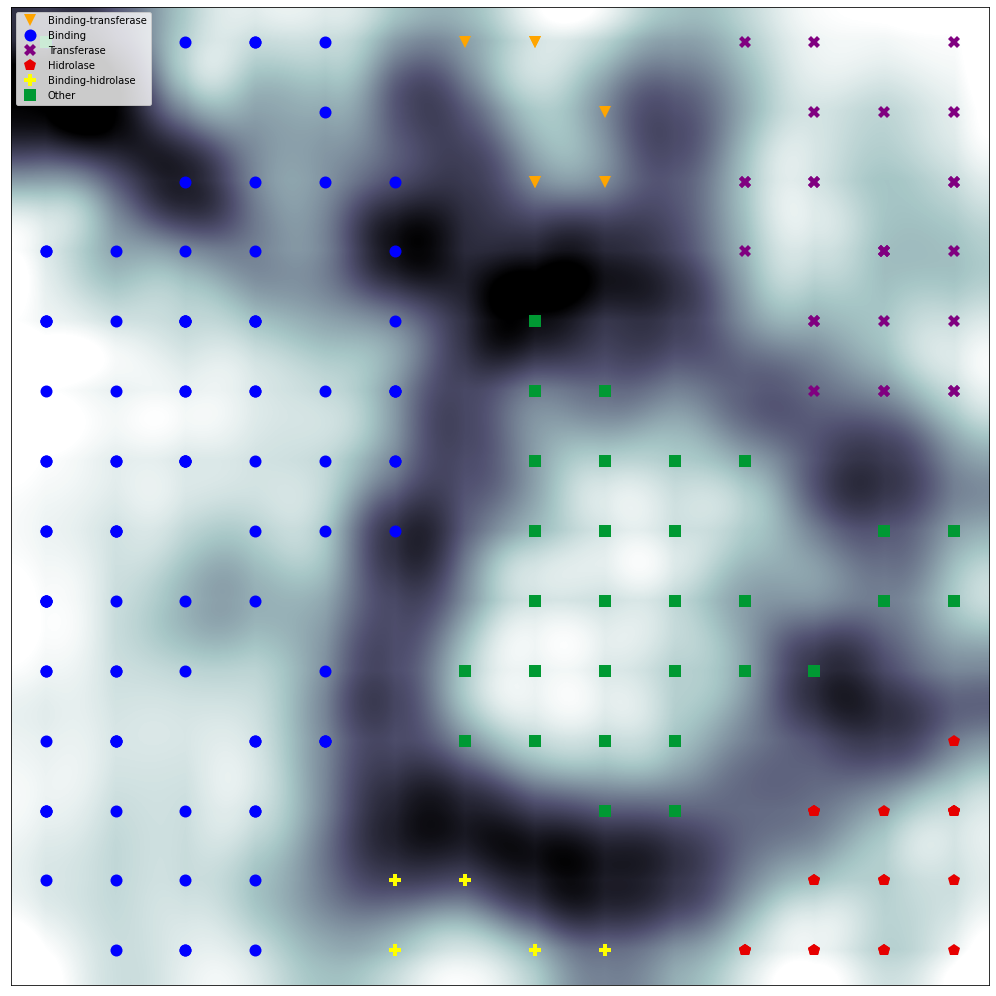

In [40]:
##Círculos azules = binding ontology
##Equis morado = Transferase ontology
##Triángulo invertido  amarillo ocre = Binding-transferase ontologies
##Pentágono rojo =  hidrolase ontology
##Más amarillo = BInding-hidrolase ontologies
##Cuadrado verde = other ontologies

seleccion = [ ('o', '#0000ff'), #circulo azul                - binding
              ('s', '#009933'), #cuadrado verde              - other
              ('p', '#e60000'), #pentagono rojo              - hidrolase
              ('X', '#800080'), #X morado                    - transferase
              ('P', '#ffff00'), #triangulo purpura           - binding hidrolase
              ('v', '#ffa500')  #triangulo invertido naranga - binding transferase
    
]

marcadores = [x[0] for x in seleccion]
colores    = [x[1] for x in seleccion]
textos     = ["Binding", "Transferase", "Binding-transferase", "Hidrolase", "Binding-hidrolase", "Other"]
text_d     = {'Binding'            : ('o', '#0000ff'), 
              'Transferase'        : ('X', '#800080'),
              'Binding-transferase': ('v', '#ffa500'),
              'Hidrolase'          : ('p', '#e60000'),
              'Other'              : ('s', '#009933'),
              'Binding-hidrolase'  : ('P', '#ffff00')}

fig, axn = plt.subplots(1,1, figsize=(18,18))

plt.imshow(M, interpolation='sinc', cmap='bone')
plt.xticks([])
plt.yticks([])

for ix,d in enumerate(datos):
    w = som.winner(d)
    plt.plot(w[0], w[1], 
             marcadores[cl[ix]],
             markerfacecolor=colores[cl[ix]],
             markeredgewidth=0.0,
             markersize=12)

#ponemos etiquetas

L = []
for ix,d in enumerate(datos):
    try:
        if(textos[cl[ix]] != ''):
            mark = marcadores[cl[ix]]
            fccl = colores[cl[ix]]
            lbl  = textos[cl[ix]]
            del(textos[cl[ix]])
            del(marcadores[cl[ix]])
            del(colores[cl[ix]])
            L.append((c, mark, fccl, lbl))
        else:
            print("No")
    except:
        pass

for v in L:
    texto = v[3]
    markd = text_d[texto][0]
    color = text_d[texto][1]
    plt.plot(0, 0, markd, markerfacecolor=color, label=texto, markeredgewidth=0, markersize=12)
print(L)
plt.legend(loc='upper left')